## up206a: Week 4: Individual Assignment: Barcelona Average Monthly Rent - 2018-2019

**Casey Leedom**

This assignment uses data from the Barcelona City Hall Open Data site regarding average monthly rent and average monthly rent/m^2 by neighborhood in Barcelona. Data was analyzed to determine the rise in rent between the years 2014-2020. 

### Import python modules

In [2]:
# Import geopandas
import geopandas as gpd

In [3]:
# and regular pandas
import pandas as pd

In [4]:
# to provide basemaps 
import contextily as ctx

In [5]:
# to give more power to your figures (plots)
import matplotlib.pyplot as plt

### Bring in data files

data file #1: spatial data file including geometry for neighborhoods

data file #2-8: data files for average monthly rent (without spatial element)

In [6]:
bb = gpd.read_file('Data/shapefiles_barrio_barcelona.geojson')

In [7]:
amr2014 = gpd.read_file('Data/2014_Average monthly rent_Barcelona.csv')
amr2015 = gpd.read_file('Data/2015_Average monthly rent_Barcelona.csv')
amr2016 = gpd.read_file('Data/2016_Average monthly rent_Barcelona.csv')
amr2017 = gpd.read_file('Data/2017_Average monthly rent_Barcelona.csv')
amr2018 = gpd.read_file('Data/2018_Average monthly rent_Barcelona.csv')
amr2019 = gpd.read_file('Data/2019_Average monthly rent_Barcelona.csv')
amr2020 = gpd.read_file('Data/2020_Average monthly rent_Barcelona.csv')

### Clean up data file #1: spatial data

We've worked with this dataframe before. It needs to be trimmed to only include the columns: c_barri, n_barri, and geometry.  

In [8]:
# Trim the dataframe so that we just have the number of the neighborhood, name of the neighborhood (for backchecking),
# and the geometry. Print the first 5 rows to test. 

bb_tr = bb[['c_barri','n_barri','geometry']]
bb_tr.head()

,c_barri,n_barri,geometry
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,la Marina del Prat Vermell,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."


### Clean up data file #2: property ownership datafile

Note: the average monthly rent data files are new and will need to be cleaned up for this notebook. Let's start with the 2019 data, and then we can copy the commands for the rest of the dataframes. We will eventually want to merge the data frames so that we have all years of data AND geometry in one dataframe. 
Note: 2020 data only has two quarters worth of average monthly rent. So for this exercise we'll use 2019 data as a template. 

In [9]:
# What does our dataframe look like? We know there are 73 barris in Barcelona. 584/73 = 8... ok. Our final dataframe 
# will need to be 73 rows, so we have some work to do. 

amr2019.shape

(584, 9)

In [10]:
# What does the data look like?

amr2019.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
0,2019,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),822.6,None
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1060.9,None
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),891.3,None
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),990.2,None
4,2019,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),957.2,None


In [11]:
# Look at the tail end of the dataframe. The second half includes monthly rent per m^2

amr2019.tail()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
579,2019,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),18.5,None
580,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8,None
581,2019,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),14.5,None
582,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),12.0,None
583,2019,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),11.4,None


#### Separate monthly rent data from monthly rent/m^2 data

We will combine these datasets later, but we'll need to have them each in their own column. 

In [12]:
# Separate out the data that shows monthly rent per m^2 

amr2019_m2 = amr2019.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")

In [13]:
# Print the data to backcheck

amr2019_m2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
73,2019,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),14.1,None
74,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),14.5,None
75,2019,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),16.8,None
76,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),14.7,None
77,2019,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),13.7,None
...,...,...,...,...,...,...,...,...,...
579,2019,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),18.5,None
580,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8,None
581,2019,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),14.5,None
582,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),12.0,None


In [14]:
# Separate out the data that is only monthly rent. Reassign this data to the amr2020 dataframe. 

amr2019 = amr2019.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

In [15]:
# Print to backcheck

amr2019

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
0,2019,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),822.6,None
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1060.9,None
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),891.3,None
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),990.2,None
4,2019,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),957.2,None
...,...,...,...,...,...,...,...,...,...
506,2019,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1498.6,None
507,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),693.8,None
508,2019,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),1013.6,None
509,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),835.7,None


In [16]:
# Trim the data. We'll keep Trimestre, Codi_Barri, Nom_Barri, and Preu and rename them to quarter, c_barri, n_barri 
# and 2019 Average Monthly Rent

amr2019_tr = amr2019[['Trimestre',
                      'Codi_Barri',
                    'Nom_Barri',
                    'Preu']]

# Rename the columns
amr2019_tr.columns = ['quarter',
                      'c_barri',
                    'n_barri',
                    '2019 Average Monthly Rent (Euros)']

amr2019_tr.head()

,quarter,c_barri,n_barri,2019 Average Monthly Rent (Euros)
0,1,1,el Raval,822.6
1,1,2,el Barri Gòtic,1060.9
2,1,3,la Barceloneta,891.3
3,1,4,"Sant Pere, Santa Caterina i la Ribera",990.2
4,1,5,el Fort Pienc,957.2


In [17]:
# Trim the data. We'll keep Codi_Barri, Nom_Barri, and Preu and rename them to c_barri, n_barri and 2020 Average 
# Monthly Rent

amr2019_m2_tr = amr2019_m2[['Trimestre',
                            'Codi_Barri',
                            'Nom_Barri',
                            'Preu']]

# Rename the columns
amr2019_m2_tr.columns = ['quarter',
                         'c_barri',
                        'n_barri',
                        '2019 Average Monthly Rent (Euros/m^2)']

amr2019_m2_tr.head()

,quarter,c_barri,n_barri,2019 Average Monthly Rent (Euros/m^2)
73,1,1,el Raval,14.1
74,1,2,el Barri Gòtic,14.5
75,1,3,la Barceloneta,16.8
76,1,4,"Sant Pere, Santa Caterina i la Ribera",14.7
77,1,5,el Fort Pienc,13.7


#### amr2019 Dataframe: Average Monthly Rent / Quarter -> Average Monthly Rent / Year

We're making progress. But there are still too many rows. We want to show data as average monthly rent per year, instead of average monthly rent per quarter. we'll need to do some math. let's see if we can do it!

In [18]:
# these trimmed dataframes look great. But they still have too many rows. 

amr2019_tr.shape

(292, 4)

In [19]:
# Let's look at the data values in the column 'quarter'. 73 of each. So we have monthly rent averages per quarter for
# the year 2019. To do our data analysis, we want to get an average for the year. 

amr2019_tr['quarter'].value_counts()

2    73
4    73
3    73
1    73
Name: quarter, dtype: int64

In [20]:
# Four el Ravals! That won't do. 

amr2019_tr.query("c_barri == '1'")

,quarter,c_barri,n_barri,2019 Average Monthly Rent (Euros)
0,1,1,el Raval,822.6
146,2,1,el Raval,867.0
292,3,1,el Raval,869.1
438,4,1,el Raval,844.9


In [21]:
# Get properties of dataframe. We'll want integers or floats to do any kind of math. 

amr2019_tr.dtypes

quarter                              object
c_barri                              object
n_barri                              object
2019 Average Monthly Rent (Euros)    object
dtype: object

In [22]:
# We'll need '2019 Average Monthly Rent (Euros)' to be float data, but let's check for any NaNs or N/As first.

amr2019_tr['2019 Average Monthly Rent (Euros)'].value_counts()

N/A       23
816.7      2
773.7      2
612.3      2
844.1      2
          ..
819.8      1
838.0      1
2023.4     1
710.7      1
1010.1     1
Name: 2019 Average Monthly Rent (Euros), Length: 265, dtype: int64

In [23]:
# Replace the N/A values with 0 for now so that they can be converted to floats. **Will need to figure out if there's
# a better method for this. 

amr2019_tr['2019 Average Monthly Rent (Euros)'] = amr2019_tr['2019 Average Monthly Rent (Euros)'].replace('N/A',0)

<ipython-input-23-85be35094287>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_tr['2019 Average Monthly Rent (Euros)'] = amr2019_tr['2019 Average Monthly Rent (Euros)'].replace('N/A',0)


In [24]:
# Convert c_barri and 2019 Average Monthly Rent (Euros) to integer and float, respectively 

amr2019_tr['c_barri'] = amr2019_tr['c_barri'].astype(int)

amr2019_tr['2019 Average Monthly Rent (Euros)'] = amr2019_tr['2019 Average Monthly Rent (Euros)'].astype(float)

amr2019_tr.dtypes

<ipython-input-24-a22b6fda6082>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_tr['c_barri'] = amr2019_tr['c_barri'].astype(int)
<ipython-input-24-a22b6fda6082>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_tr['2019 Average Monthly Rent (Euros)'] = amr2019_tr['2019 Average Monthly Rent (Euros)'].astype(float)


quarter                               object
c_barri                                int64
n_barri                               object
2019 Average Monthly Rent (Euros)    float64
dtype: object

In [25]:
amr2019_tr

,quarter,c_barri,n_barri,2019 Average Monthly Rent (Euros)
0,1,1,el Raval,822.6
1,1,2,el Barri Gòtic,1060.9
2,1,3,la Barceloneta,891.3
3,1,4,"Sant Pere, Santa Caterina i la Ribera",990.2
4,1,5,el Fort Pienc,957.2
...,...,...,...,...
506,4,69,Diagonal Mar i el Front Marítim del Poblenou,1498.6
507,4,70,el Besòs i el Maresme,693.8
508,4,71,Provençals del Poblenou,1013.6
509,4,72,Sant Martí de Provençals,835.7


In [26]:
# Pivot table so that rent values for each quarter are in column form. Then we can find the average for the year. 

amr2019_tr_pv=amr2019_tr.pivot_table(columns='quarter',index='c_barri',values ='2019 Average Monthly Rent (Euros)')

In [27]:
amr2019_tr_pv

quarter,1,2,3,4
c_barri,,,,
1,822.6,867.0,869.1,844.9
2,1060.9,1112.1,1082.4,1139.7
3,891.3,924.0,871.6,893.0
4,990.2,1010.1,1020.2,966.4
5,957.2,988.7,1031.3,1064.4
...,...,...,...,...
69,1231.2,1388.1,1409.4,1498.6
70,694.8,844.5,728.3,693.8
71,959.2,960.1,996.4,1013.6


In [28]:
# Create a column that will be the average monthly rent for the year (average of quarters 1, 2, 3, 4)

amr2019_tr_pv['2019 Average Monthly Rent (Euros)']=(amr2019_tr_pv['1']+amr2019_tr_pv['2']+amr2019_tr_pv['3']+amr2019_tr_pv['4'])/4
amr2019_tr_pv.head()

quarter,1,2,3,4,2019 Average Monthly Rent (Euros)
c_barri,,,,,
1,822.6,867.0,869.1,844.9,850.900
2,1060.9,1112.1,1082.4,1139.7,1098.775
3,891.3,924.0,871.6,893.0,894.975
4,990.2,1010.1,1020.2,966.4,996.725
5,957.2,988.7,1031.3,1064.4,1010.400


In [29]:
# Trim the data so that we only have the "2019 Average Monthly Rent (Euros)" column
amr2019_fin = amr2019_tr_pv[['2019 Average Monthly Rent (Euros)']]
amr2019_fin

quarter,2019 Average Monthly Rent (Euros)
c_barri,
1,850.900
2,1098.775
3,894.975
4,996.725
5,1010.400
...,...
69,1381.825
70,740.350
71,982.325


#### amr2019_m2 Dataframe: Average Monthly Rent / Quarter -> Average Monthly Rent / Year

Run through the same steps for the amr2019_m2_tr dataframe

In [30]:
# these trimmed dataframes look great. But they still have too many rows. 

amr2019_m2_tr.shape

(292, 4)

In [31]:
# Let's look at the data values in the column 'quarter'. 73 of each. So we have monthly rent averages per quarter for
# the year 2019. To do our data analysis, we want to get an average for the year. 

amr2019_m2_tr['quarter'].value_counts()

2    73
4    73
3    73
1    73
Name: quarter, dtype: int64

In [32]:
# Get properties of dataframe. We'll want integers to do any kind of math. 

amr2019_m2_tr.dtypes

quarter                                  object
c_barri                                  object
n_barri                                  object
2019 Average Monthly Rent (Euros/m^2)    object
dtype: object

In [33]:
# We'll need '2019 Average Monthly Rent (Euros)' to be float data, but let's check for any NaNs or N/As first.

amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].value_counts()

N/A     23
13.9    12
12.2    10
12.9     9
13.8     8
        ..
17.3     1
15.4     1
15.1     1
17.1     1
17.9     1
Name: 2019 Average Monthly Rent (Euros/m^2), Length: 82, dtype: int64

In [34]:
# Replace the N/A values with 0 for now so that they can be converted to floats. **Will need to figure out if there's
# a better method for this. 

amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'] = amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].replace('N/A',0)

<ipython-input-34-619d5f28a5eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'] = amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].replace('N/A',0)


In [35]:
# Convert c_barri and 2019 Average Monthly Rent (Euros) to integer and float, respectively 

amr2019_m2_tr['c_barri'] = amr2019_m2_tr['c_barri'].astype(int)

amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'] = amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].astype(float)

amr2019_m2_tr.dtypes

<ipython-input-35-21e80e22ca5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_m2_tr['c_barri'] = amr2019_m2_tr['c_barri'].astype(int)
<ipython-input-35-21e80e22ca5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'] = amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].astype(float)


quarter                                   object
c_barri                                    int64
n_barri                                   object
2019 Average Monthly Rent (Euros/m^2)    float64
dtype: object

In [36]:
amr2019_m2_tr.head()

,quarter,c_barri,n_barri,2019 Average Monthly Rent (Euros/m^2)
73,1,1,el Raval,14.1
74,1,2,el Barri Gòtic,14.5
75,1,3,la Barceloneta,16.8
76,1,4,"Sant Pere, Santa Caterina i la Ribera",14.7
77,1,5,el Fort Pienc,13.7


In [37]:
# Pivot table so that rent values for each quarter are in column form. Then we can find the average for the year. 

amr2019_m2_tr_pv=amr2019_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2019 Average Monthly Rent (Euros/m^2)')

In [38]:
amr2019_m2_tr_pv.head()

quarter,1,2,3,4
c_barri,,,,
1,14.1,14.5,14.7,14.0
2,14.5,14.0,14.3,14.3
3,16.8,18.1,17.7,17.0
4,14.7,15.5,15.7,14.8
5,13.7,13.6,14.3,14.4


In [39]:
# Create a column that will be the average monthly rent for the year (average of quarters 1, 2, 3, 4)

amr2019_m2_tr_pv['2019 Average Monthly Rent (Euros/m^2)']=(amr2019_m2_tr_pv['1']+amr2019_m2_tr_pv['2']+amr2019_m2_tr_pv['3']+amr2019_m2_tr_pv['4'])/4
amr2019_m2_tr_pv.head()

quarter,1,2,3,4,2019 Average Monthly Rent (Euros/m^2)
c_barri,,,,,
1,14.1,14.5,14.7,14.0,14.325
2,14.5,14.0,14.3,14.3,14.275
3,16.8,18.1,17.7,17.0,17.400
4,14.7,15.5,15.7,14.8,15.175
5,13.7,13.6,14.3,14.4,14.000


In [40]:
# Trim the data so that we only have the "2019 Average Monthly Rent (Euros)" column
amr2019_m2_fin = amr2019_m2_tr_pv[['2019 Average Monthly Rent (Euros/m^2)']]
amr2019_m2_fin

quarter,2019 Average Monthly Rent (Euros/m^2)
c_barri,
1,14.325
2,14.275
3,17.400
4,15.175
5,14.000
...,...
69,17.350
70,11.350
71,14.100


### Can we efficiently clean up the dataframes for the other years??

It seems like there could be some improvements here. Plus, not getting a large red error box would be grand. 

#### 2018 Data Clean-Up

We'll double up some of the commands here for efficiency. 

In [41]:
# Separate out the  monthly rent per m^2 

amr2018_m2 = amr2018.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2018 = amr2018.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

In [42]:
amr2018

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,geometry
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,None
1,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),998.4,None
2,2018,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),870.84,None
3,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),923.44,None
4,2018,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),910.53,None
...,...,...,...,...,...,...,...,...,...
287,2018,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1307.79,None
288,2018,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),711.67,None
289,2018,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),999.63,None
290,2018,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),823.46,None


In [43]:
# Trim the data. We'll keep Trimestre, Codi_Barri, Nom_Barri, and Preu and rename them to quarter, c_barri, n_barri 
# and 2020 Average Monthly Rent

amr2018_tr = amr2018[['Trimestre',
                      'Codi_Barri',
                    'Nom_Barri',
                    'Preu']]

# Rename the columns
amr2018_tr.columns = ['quarter',
                      'c_barri',
                    'n_barri',
                    '2018 Average Monthly Rent (Euros)']

amr2018_tr.head()

,quarter,c_barri,n_barri,2018 Average Monthly Rent (Euros)
0,1,1,el Raval,792.74
1,1,2,el Barri Gòtic,998.4
2,1,3,la Barceloneta,870.84
3,1,4,"Sant Pere, Santa Caterina i la Ribera",923.44
4,1,5,el Fort Pienc,910.53


In [44]:
# Trim the data. We'll keep Codi_Barri, Nom_Barri, and Preu and rename them to c_barri, n_barri and 2020 Average 
# Monthly Rent

amr2018_m2_tr = amr2018_m2[['Trimestre',
                            'Codi_Barri',
                            'Nom_Barri',
                            'Preu']]

# Rename the columns
amr2018_m2_tr.columns = ['quarter',
                         'c_barri',
                        'n_barri',
                        '2018 Average Monthly Rent (Euros/m^2)']

amr2018_m2_tr.head()

,quarter,c_barri,n_barri,2018 Average Monthly Rent (Euros/m^2)
292,1,1,el Raval,13.74
293,1,2,el Barri Gòtic,13.3
294,1,3,la Barceloneta,17.1
295,1,4,"Sant Pere, Santa Caterina i la Ribera",14.68
296,1,5,el Fort Pienc,12.63


In [45]:
# Use value counts to check if there are any NA, N/A, NaN values. This dataframe has NA values instead of N/A, which 
# makes streamlining a template more challenging. 

amr2018_tr['2018 Average Monthly Rent (Euros)'].value_counts()

NA         22
923.39      1
913.2       1
1284.3      1
754.53      1
           ..
763.82      1
972.89      1
514.52      1
1332.33     1
1283.24     1
Name: 2018 Average Monthly Rent (Euros), Length: 271, dtype: int64

In [46]:
# Replace the NA values with 0 for now so that they can be converted to floats. **Will need to figure out if there's
# a better method for this. These red error boxes are alarming. 

amr2018_tr['2018 Average Monthly Rent (Euros)'] = amr2018_tr['2018 Average Monthly Rent (Euros)'].replace('NA',0)
amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'] = amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'].replace('NA',0)

<ipython-input-46-51b5dded1118>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2018_tr['2018 Average Monthly Rent (Euros)'] = amr2018_tr['2018 Average Monthly Rent (Euros)'].replace('NA',0)
<ipython-input-46-51b5dded1118>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'] = amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'].replace('NA',0)


In [47]:
# Convert c_barri and 2018 Average Monthly Rent (Euros) to integer and float, respectively 

amr2018_tr['c_barri'] = amr2018_tr['c_barri'].astype(int)
amr2018_tr['2018 Average Monthly Rent (Euros)'] = amr2018_tr['2018 Average Monthly Rent (Euros)'].astype(float)

amr2018_m2_tr['c_barri'] = amr2018_m2_tr['c_barri'].astype(int)
amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'] = amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'].astype(float)

<ipython-input-47-abab4bc2a6ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2018_tr['c_barri'] = amr2018_tr['c_barri'].astype(int)
<ipython-input-47-abab4bc2a6ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amr2018_tr['2018 Average Monthly Rent (Euros)'] = amr2018_tr['2018 Average Monthly Rent (Euros)'].astype(float)
<ipython-input-47-abab4bc2a6ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [48]:
# Check that the datatypes have been converted successfully

amr2018_tr.dtypes

quarter                               object
c_barri                                int64
n_barri                               object
2018 Average Monthly Rent (Euros)    float64
dtype: object

In [49]:
# Check that the datatypes have been converted successfully

amr2018_m2_tr.dtypes

quarter                                   object
c_barri                                    int64
n_barri                                   object
2018 Average Monthly Rent (Euros/m^2)    float64
dtype: object

In [50]:
# Pivot tables so that rent values for each quarter are in column form. Then we can find the average for the year. 

amr2018_tr_pv=amr2018_tr.pivot_table(columns='quarter',index='c_barri',values ='2018 Average Monthly Rent (Euros)')
amr2018_m2_tr_pv=amr2018_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2018 Average Monthly Rent (Euros/m^2)')

In [51]:
amr2018_tr_pv.head()

quarter,1,2,3,4
c_barri,,,,
1,792.74,820.88,849.32,827.27
2,998.40,1024.29,1012.49,1057.26
3,870.84,923.45,889.24,913.20
4,923.44,991.39,970.97,1000.52
5,910.53,942.96,968.85,983.10


In [52]:
amr2018_m2_tr_pv.head()

quarter,1,2,3,4
c_barri,,,,
1,13.74,14.14,14.12,14.07
2,13.30,14.15,13.54,14.10
3,17.10,16.31,16.85,17.41
4,14.68,15.09,15.12,15.20
5,12.63,12.92,13.41,13.61


In [53]:
# Create a column that will be the average monthly rent for the year (average of quarters 1, 2, 3, 4)

amr2018_tr_pv['2018 Average Monthly Rent (Euros)']=(amr2018_tr_pv['1']+amr2018_tr_pv['2']+amr2018_tr_pv['3']+amr2018_tr_pv['4'])/4

amr2018_m2_tr_pv['2018 Average Monthly Rent (Euros/m^2)']=(amr2018_m2_tr_pv['1']+amr2018_m2_tr_pv['2']+amr2018_m2_tr_pv['3']+amr2018_m2_tr_pv['4'])/4


In [54]:
amr2018_tr_pv.head()

quarter,1,2,3,4,2018 Average Monthly Rent (Euros)
c_barri,,,,,
1,792.74,820.88,849.32,827.27,822.5525
2,998.40,1024.29,1012.49,1057.26,1023.1100
3,870.84,923.45,889.24,913.20,899.1825
4,923.44,991.39,970.97,1000.52,971.5800
5,910.53,942.96,968.85,983.10,951.3600


In [55]:
amr2018_m2_tr_pv.head()

quarter,1,2,3,4,2018 Average Monthly Rent (Euros/m^2)
c_barri,,,,,
1,13.74,14.14,14.12,14.07,14.0175
2,13.30,14.15,13.54,14.10,13.7725
3,17.10,16.31,16.85,17.41,16.9175
4,14.68,15.09,15.12,15.20,15.0225
5,12.63,12.92,13.41,13.61,13.1425


In [56]:
# Trim the data so that we only have the "2019 Average Monthly Rent (Euros)" column
amr2018_fin = amr2018_tr_pv[['2018 Average Monthly Rent (Euros)']]
amr2018_m2_fin = amr2018_m2_tr_pv[['2018 Average Monthly Rent (Euros/m^2)']]

In [57]:
amr2018_fin.head()

quarter,2018 Average Monthly Rent (Euros)
c_barri,
1,822.5525
2,1023.1100
3,899.1825
4,971.5800
5,951.3600


In [58]:
amr2018_m2_fin.head()

quarter,2018 Average Monthly Rent (Euros/m^2)
c_barri,
1,14.0175
2,13.7725
3,16.9175
4,15.0225
5,13.1425


### The Big Kahuna: Combine dataframes, add geometry

This took a lot of trial and error initially, but we've got a better system now - the merge command! Because I set up each dataframe with c_barri, we can use that column as a common element to merge. 

In [59]:
# Combine the two 2018 dataframes

amr2018_fin = amr2018_fin.merge(amr2018_m2_fin, on='c_barri')
amr2018_fin.head(1)

quarter,2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2)
c_barri,,
1,822.5525,14.0175


In [60]:
# Combine the two 2019 dataframes

amr2019_fin = amr2019_fin.merge(amr2019_m2_fin, on='c_barri')
amr2019_fin.head()

quarter,2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2)
c_barri,,
1,850.900,14.325
2,1098.775,14.275
3,894.975,17.400
4,996.725,15.175
5,1010.400,14.000


In [61]:
# Combine the 2018 and 2019 dataframes. In retrospect, I would probably do this in reverse so that the data was 
# listed chronologically

amr2019_fin = amr2019_fin.merge(amr2018_fin, on='c_barri')
amr2019_fin.head()

quarter,2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2)
c_barri,,,,
1,850.900,14.325,822.5525,14.0175
2,1098.775,14.275,1023.1100,13.7725
3,894.975,17.400,899.1825,16.9175
4,996.725,15.175,971.5800,15.0225
5,1010.400,14.000,951.3600,13.1425


In [62]:
# Combine the rent data with the spatial data for barris

amr_spa = amr2019_fin.merge(bb_tr, on='c_barri')

In [63]:
# Print the first 5 rows to check that it worked. It did!

amr_spa.head()

,c_barri,2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2),n_barri,geometry
0,1,850.900,14.325,822.5525,14.0175,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,1098.775,14.275,1023.1100,13.7725,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,894.975,17.400,899.1825,16.9175,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,996.725,15.175,971.5800,15.0225,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,1010.400,14.000,951.3600,13.1425,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [64]:
# Check dataframe shape. It should be 73 rows (one per barri)

amr_spa.shape

(73, 7)

### Convert dataframe type to GeoDataFrame in order to use data spatially

This also took some trial and error, because even with added geometry, the amr_spa dataframe was still a standard dataframe. Here we import GeoDataFrame from geopandas in order to convert the dataframe into a geodataframe type. 

In [65]:
# Check the type of dataframe we have
type(amr_spa)

pandas.core.frame.DataFrame

In [66]:
# Import GeoDataFrame from geopandas
from geopandas import GeoDataFrame

In [67]:
# Convert the ot2009_sorted dataframe into a geodataframe
amr_spa = GeoDataFrame(amr_spa)

In [68]:
# Check that the dataframe was converted. It was.
type(amr_spa)

geopandas.geodataframe.GeoDataFrame

### Create graphs

Perform functions on the average monthly rent data to produce statistical values and graphs.

In [69]:
# Find the average monthly rent in all of Barcelona
# Later: Find out how to break this command into 2+ lines
# NOTE: This mean includes the zero values found in the average monthly rent, where there were "N/A" values previously
# Will need to find out how to remove zero values from data in order to do a more accurate mean calculation

print('The average monthly rent for 2019 in all of Barcelona is', round(amr_spa['2019 Average Monthly Rent (Euros)'].mean(),2),'Euros')

The average monthly rent for 2019 in all of Barcelona is 850.59 Euros


In [70]:
# Output statistical values for 'Total' column

amr_spa['2019 Average Monthly Rent (Euros)'].describe()

count      73.000000
mean      850.594178
std       344.864392
min         0.000000
25%       744.550000
50%       851.625000
75%       996.725000
max      1863.175000
Name: 2019 Average Monthly Rent (Euros), dtype: float64

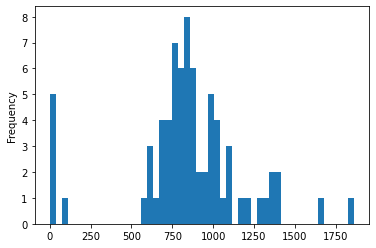

In [71]:
# Plot a histogram of the 'Total' number of properties

amr_spa['2019 Average Monthly Rent (Euros)'].plot.hist(bins=50)

In [88]:
# Extract the 'n_barri' and average monthly rent data to produce a bar chart.

amr_data = amr_spa[['n_barri', '2018 Average Monthly Rent (Euros)','2019 Average Monthly Rent (Euros)']]

In [89]:
# Print first 5 rows to check new dataframe

amr_data.head()

,n_barri,2018 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros)
0,el Raval,822.5525,850.900
1,el Barri GÃ²tic,1023.1100,1098.775
2,la Barceloneta,899.1825,894.975
3,"Sant Pere, Santa Caterina i la Ribera",971.5800,996.725
4,el Fort Pienc,951.3600,1010.400


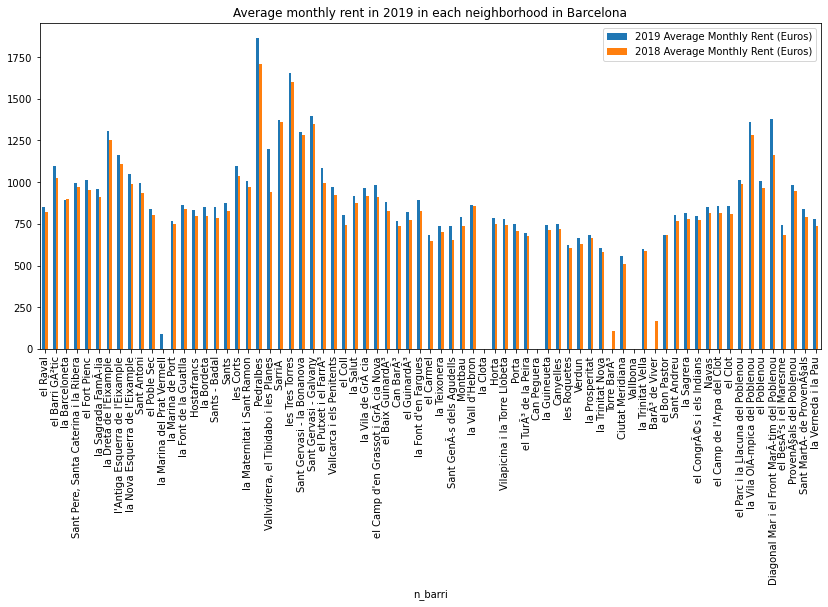

In [90]:
# Print a bar chart with the name of each neighborhood on the x-axis and the 2019 Average Monthly Rent (Euros) on the 
# y axis. I would like this to display data with 2018 on the left and 2019 on the right...

amr_data.plot.bar(figsize = (14, 6), x = 'n_barri', y = {'2018 Average Monthly Rent (Euros)','2019 Average Monthly Rent (Euros)'}, title = 'Average monthly rent in 2019 in each neighborhood in Barcelona')

In [75]:
# I would really like to create a line graph, with a line for each of the neighborhoods, years on the x axis, and
# Average monthly rent on the y axis. 

### Create maps

Try some overall maps with the Average Monthly Rent data. Create sets of subplots side-by-side.

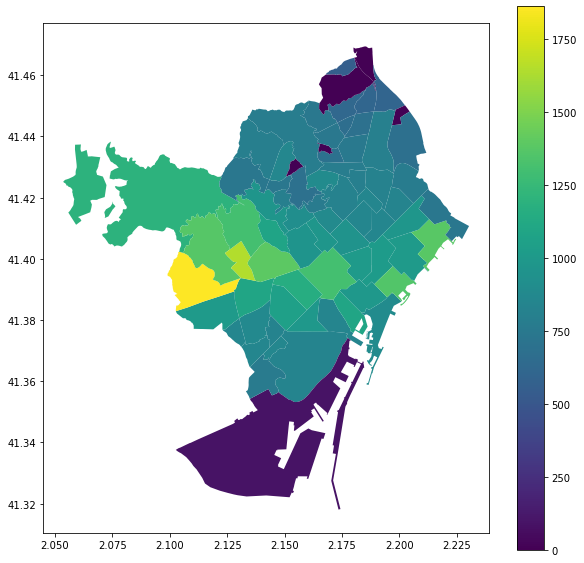

In [78]:
# Test a map! Here's a map of 2019 Average Monthly Rent by neighborhood. A beautiful moment, really.

amr_spa.plot(figsize=(10,10),column='2019 Average Monthly Rent (Euros)',legend=True)

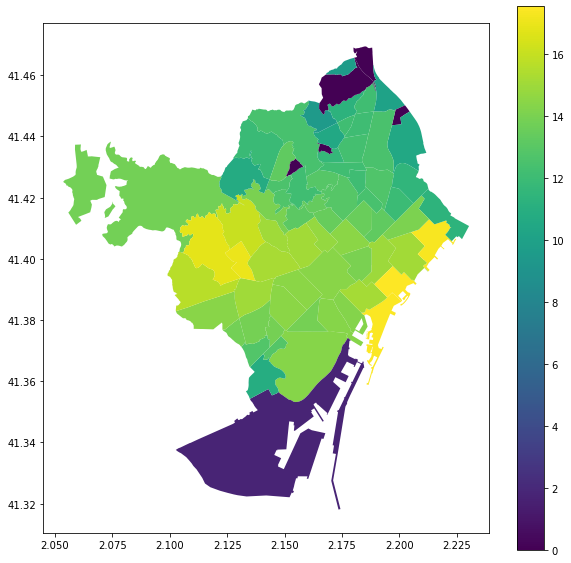

In [79]:
# Here's a map of 2019 Average Monthly Rent / m^2 by neighborhood. 

amr_spa.plot(figsize=(10,10),
                   column='2019 Average Monthly Rent (Euros/m^2)',
                   legend=True)

### Create subplots to compare multiple data

Things I would like to learn:
- how to set the two subplots to the same scale/scheme so that they can be directly compared. 

Text(0.5, 1.0, 'Average 2019 Monthly Rent in Barcelona')

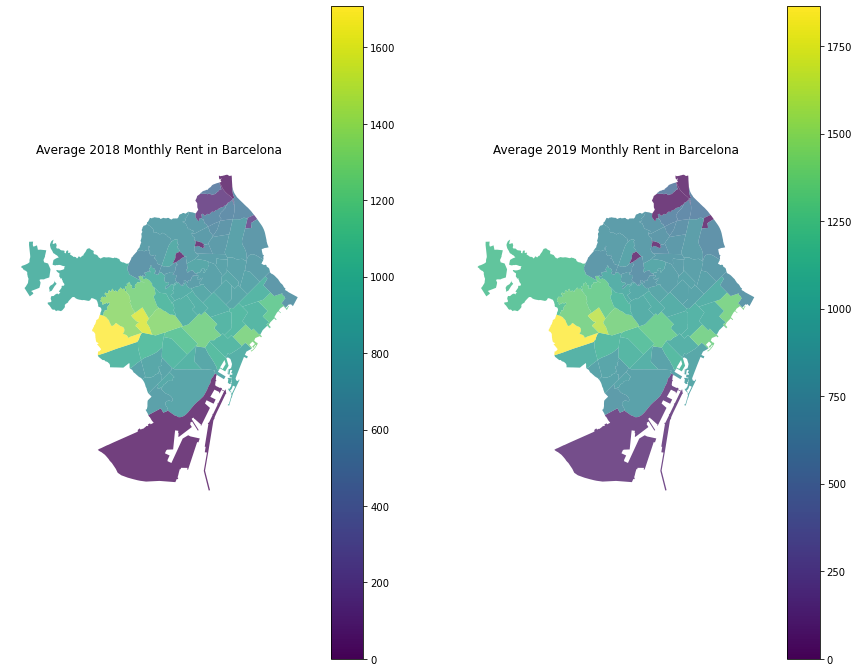

In [80]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
amr_spa.plot(column = '2018 Average Monthly Rent (Euros)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            #scheme = 'quantiles',
            k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Average 2018 Monthly Rent in Barcelona") # add a title to ax1

# Right map
amr_spa.plot(column = '2019 Average Monthly Rent (Euros)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True)

ax2.axis("off")
ax2.set_title("Average 2019 Monthly Rent in Barcelona")

Text(0.5, 1.0, 'Average 2019 Monthly Rent / m^2 in Barcelona')

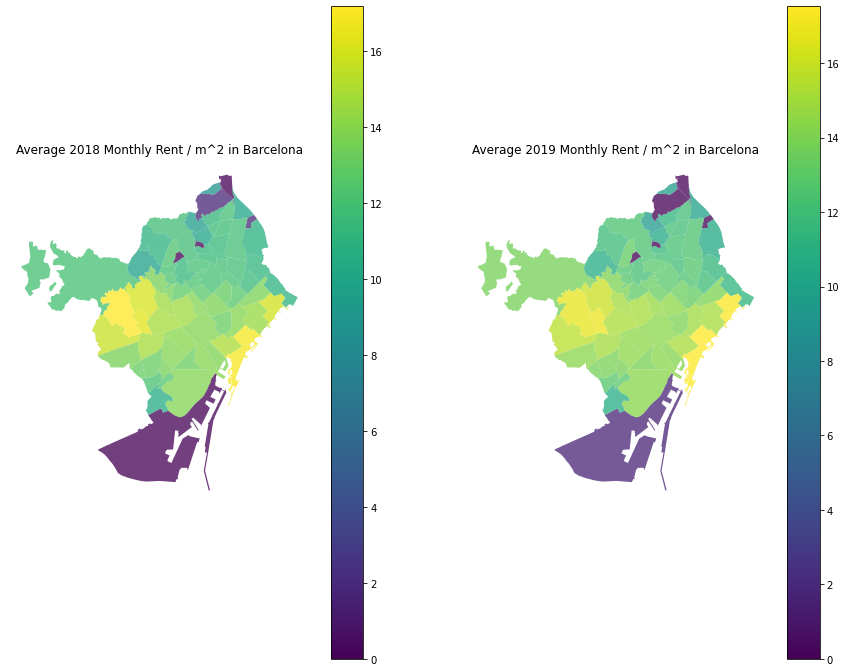

In [81]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
amr_spa.plot(column = '2018 Average Monthly Rent (Euros/m^2)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            #scheme = 'quantiles',
            k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Average 2018 Monthly Rent / m^2 in Barcelona") # add a title to ax1

# Right map
amr_spa.plot(column = '2019 Average Monthly Rent (Euros/m^2)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True)

ax2.axis("off")
ax2.set_title("Average 2019 Monthly Rent / m^2 in Barcelona")

### Try calculating the percent increase/decrease in rent price

This data will help us understand the increase or decrease in average rent prices from year to year. I think the rent price / m^2 might be the best measure of this. We'll also need to look at which areas have rent control (if they do). Things to consider:
* are certain buildings or neighborhoods under rent control?
* do rent increases correlate with neighborhoods that have more new construction?

In [82]:
amr_spa.head()

,c_barri,2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2),n_barri,geometry
0,1,850.900,14.325,822.5525,14.0175,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,1098.775,14.275,1023.1100,13.7725,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,894.975,17.400,899.1825,16.9175,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,996.725,15.175,971.5800,15.0225,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,1010.400,14.000,951.3600,13.1425,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [83]:
# Create new columns for Difference in Average Monthly Rent to quantify the increase or decrease in rent between 2018
# and 2019

amr_spa['Difference in Average Monthly Rent (2018-2019)']=amr_spa['2019 Average Monthly Rent (Euros)']-amr_spa['2018 Average Monthly Rent (Euros)']
amr_spa['Difference in Average Monthly Rent/m^2 (2018-2019)']=amr_spa['2019 Average Monthly Rent (Euros/m^2)']-amr_spa['2018 Average Monthly Rent (Euros/m^2)']

In [84]:
# Create new columns for Percent Increase/Decrease in Average Monthly Rent to quantify the increase or decrease in 
# rent between 2018 and 2019

amr_spa['Percent Increase/Decrease in Average Monthly Rent (2018-2019)']=amr_spa['Difference in Average Monthly Rent (2018-2019)']/amr_spa['2018 Average Monthly Rent (Euros)']*100
amr_spa['Percent Increase/Decrease in Average Monthly Rent/m^2 (2018-2019)']=amr_spa['Difference in Average Monthly Rent/m^2 (2018-2019)']/amr_spa['2018 Average Monthly Rent (Euros/m^2)']*100

In [85]:
amr_spa.head()

,c_barri,2019 Average Monthly Rent (Euros),2019 Average Monthly Rent (Euros/m^2),2018 Average Monthly Rent (Euros),2018 Average Monthly Rent (Euros/m^2),n_barri,geometry,Difference in Average Monthly Rent (2018-2019),Difference in Average Monthly Rent/m^2 (2018-2019),Percent Increase/Decrease in Average Monthly Rent (2018-2019),Percent Increase/Decrease in Average Monthly Rent/m^2 (2018-2019)
0,1,850.900,14.325,822.5525,14.0175,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",28.3475,0.3075,3.446285,2.193686
1,2,1098.775,14.275,1023.1100,13.7725,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",75.6650,0.5025,7.395588,3.648575
2,3,894.975,17.400,899.1825,16.9175,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",-4.2075,0.4825,-0.467925,2.852076
3,4,996.725,15.175,971.5800,15.0225,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3...",25.1450,0.1525,2.588052,1.015144
4,5,1010.400,14.000,951.3600,13.1425,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3...",59.0400,0.8575,6.205853,6.524634


Text(0.5, 1.0, 'Difference in Average Monthly Rent - Euros/m^2 (2018-2019)')

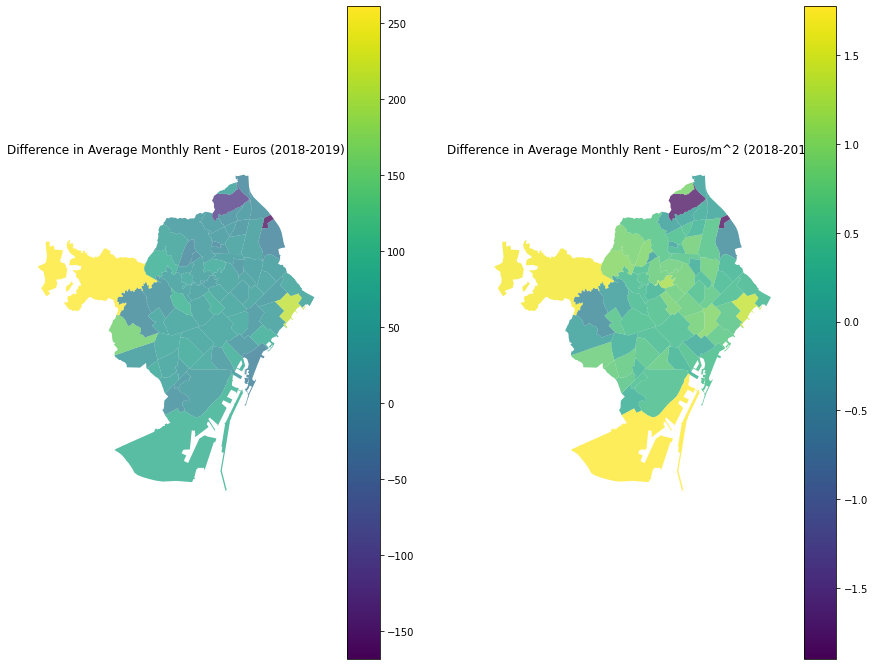

In [91]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
amr_spa.plot(column = 'Difference in Average Monthly Rent (2018-2019)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            #scheme = 'quantiles',
            #k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Difference in Average Monthly Rent - Euros (2018-2019)") # add a title to ax1

# Right map
amr_spa.plot(column = 'Difference in Average Monthly Rent/m^2 (2018-2019)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            #k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True)

ax2.axis("off")
ax2.set_title("Difference in Average Monthly Rent - Euros/m^2 (2018-2019)")

In [ ]:
# Hmmm.. I think some of the percent values had to divide by zero - need to figure out a better way to eliminate some
# of the data that comes in as N/A so that the remainder of the data is usable 

In [ ]:
# The end!